<a href="https://colab.research.google.com/github/Anshikapundir1/cardio/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import useful libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Data Collection and Processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cardiovascular_Disease_Dataset.csv to Cardiovascular_Disease_Dataset.csv


In [ ]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
#print first 5 rows of dataset
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
#print last 5 rows of dataset
df.tail()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1
999,9990855,25,1,0,158,270,0,0,143,1,4.7,0,0,0


In [ ]:
# number of rows and columns in the dataset
df.shape

(1000, 14)

In [ ]:
# getting some info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None


In [ ]:
# checking for missing values
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [ ]:
# statiscal measures about the data
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


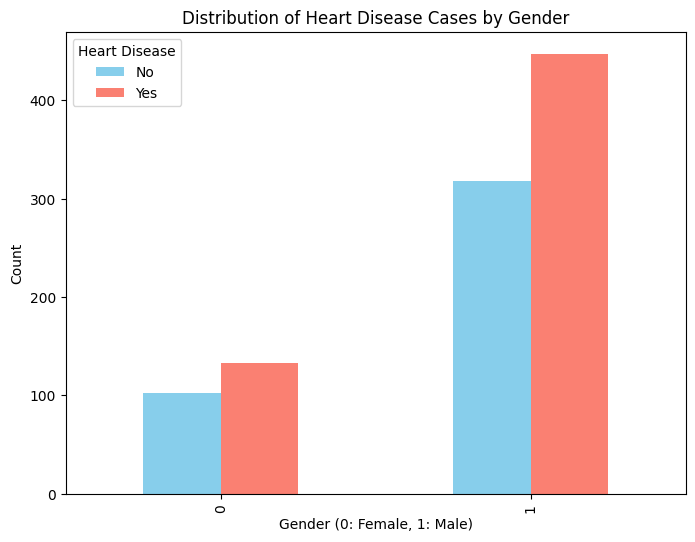

In [ ]:
# Grouping data by 'gender' and 'heart_disease' and calculating counts
gender_counts = df.groupby(['gender', 'target']).size().unstack()

# Plotting the counts as a bar chart
gender_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Distribution of Heart Disease Cases by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [ ]:
# checking the distribution of Target Variable
df['target'].value_counts()

,count
target,
1,580
0,420


1 ---> Defective Heart

0 ---> Healthy Heart

In [ ]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [ ]:
print(X)

     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

In [ ]:
print(Y)

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64


Splitting Data into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# print the shapes (dimensions) of the datasets involved in the train-test split
print(X.shape,X_train.shape,X_test.shape)

(1000, 13) (800, 13) (200, 13)


In [ ]:
# standardization to the features in the training and testing datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Model Training


----> Logistic Regression

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Training the Logistic Regression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Model Evaluation


Accuracy Score

In [ ]:
# accuracy on training data
X_train_pred = model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 0.97


In [ ]:
# accuracy on test data
X_test_pred = model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
print("Accuracy on Test Data :",test_data_accuracy)

Accuracy on Test Data : 0.96


In [ ]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



Confusion Matrix

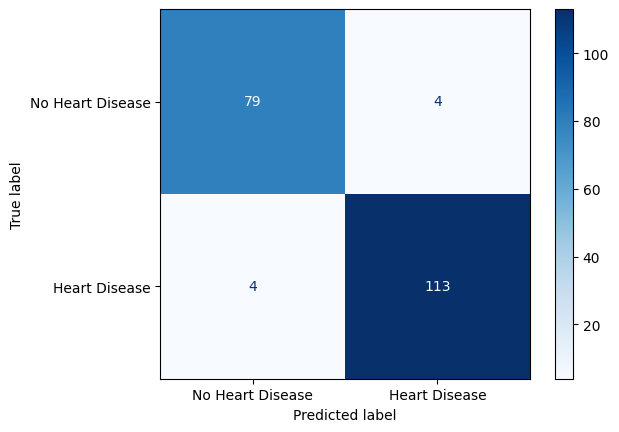

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, X_test_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues', values_format='d')

Building a Predictive Model

In [ ]:
# When scaling the input_data, use DataFrame format
input_data = (192523,61,0,0,190,181,0,1,150,0,2.9,2,0)
input_data_as_df = pd.DataFrame([input_data], columns=X.columns)
input_data_scaled = scaler.transform(input_data_as_df)

# Make prediction with the scaled input
prediction = model.predict(input_data_scaled)
print(prediction)
# Output result
if prediction[0] == 0:
    print("The Person does NOT have Heart Disease")
else:
    print("The Person has Heart Disease")


[1]
The Person has Heart Disease


----> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# accuracy on training data
X_train_pred = rf_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 1.0


In [ ]:
# accuracy on test data
X_test_pred = rf_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
print("Accuracy on Test Data :",test_data_accuracy)

Accuracy on Test Data : 0.985


In [ ]:
print(classification_report(Y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.98      0.99      0.99       117

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [ ]:
# When scaling the input_data, use DataFrame format
input_data = (734984,68,0,0,140,244,0,1,90,1,0.1,1,0)
input_data_as_df = pd.DataFrame([input_data], columns=X.columns)
input_data_scaled = scaler.transform(input_data_as_df)

# Make prediction with the scaled input
prediction = rf_model.predict(input_data_scaled)
print(prediction)
# Output result
if prediction[0] == 0:
    print("The Person does NOT have Heart Disease")
else:
    print("The Person has Heart Disease")


[0]
The Person does NOT have Heart Disease


----> SVM(Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
# Training the Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can try 'rbf', 'poly', or 'sigmoid' kernels
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# accuracy on training data
X_train_pred = svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 0.97375


In [ ]:
# accuracy on test data
X_test_pred = svm_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
print("Accuracy on Test Data :",test_data_accuracy)

Accuracy on Test Data : 0.965


In [ ]:
print(classification_report(Y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
# When scaling the input_data, use DataFrame format
input_data = (765974,34,1,0,137,199,0,0,113,1,5.1,1,1)
input_data_as_df = pd.DataFrame([input_data], columns=X.columns)
input_data_scaled = scaler.transform(input_data_as_df)

# Make prediction with the scaled input
prediction = svm_model.predict(input_data_scaled)
print(prediction)
# Output result
if prediction[0] == 0:
    print("The Person does NOT have Heart Disease")
else:
    print("The Person has Heart Disease")

[0]
The Person does NOT have Heart Disease


----> KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Training the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5, you can experiment with this
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# accuracy on training data
X_train_pred = knn_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 0.9575


In [ ]:
# accuracy on test data
X_test_pred = knn_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
print("Accuracy on Test Data :",test_data_accuracy)

Accuracy on Test Data : 0.955


In [ ]:
print(classification_report(Y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        83
           1       0.97      0.95      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



In [ ]:
# When scaling the input_data, use DataFrame format
input_data = (834829,78,1,2,172,309,1,2,173,0,6,2,1)
input_data_as_df = pd.DataFrame([input_data], columns=X.columns)
input_data_scaled = scaler.transform(input_data_as_df)

# Make prediction with the scaled input
prediction = knn_model.predict(input_data_scaled)
print(prediction)
# Output result
if prediction[0] == 0:
    print("The Person does NOT have Heart Disease")
else:
    print("The Person has Heart Disease")

[1]
The Person has Heart Disease


Comapre the test acuuracy between the 4 models

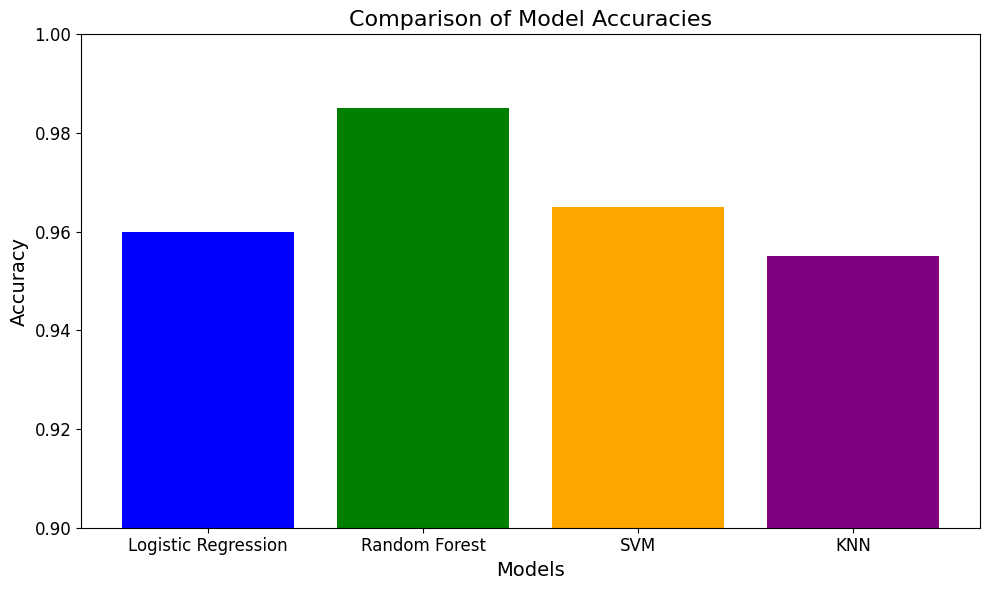

In [ ]:
import matplotlib.pyplot as plt

# Accuracies of the models (example values; replace with actual results)
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [0.96, 0.985, 0.965, 0.955]  # Replace these with actual accuracy values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])

# Adding titles and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Set y-axis range for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Save Trained Models

In [ ]:
import pickle
all_models=[model, rf_model, svm_model, knn_model]
with open("models.pkl",'wb') as files:
  pickle.dump(all_models,files)
print("Done")

Done


In [ ]:
open_file=open("models.pkl","rb")
loaded_list=pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[LogisticRegression(class_weight='balanced', max_iter=1000), RandomForestClassifier(random_state=42), SVC(kernel='linear', random_state=42), KNeighborsClassifier()]
Done


In [ ]:
from google.colab import files
files.download('models.pkl')  # or .h5 if it's a Keras model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>